In [38]:
pip install pandas -q


Note: you may need to restart the kernel to use updated packages.


In [39]:
 pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd

In [42]:
pip install torch -q

Note: you may need to restart the kernel to use updated packages.


In [43]:
import torch
print(torch.__version__)

1.9.0+cu111


In [44]:
pip install torchvision -q


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install scikit-learn  -q

Note: you may need to restart the kernel to use updated packages.


In [47]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import shutil
import time
import collections
import math
import pandas as pd


In [48]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [49]:
#import shutil

#zip_file_path = "/home/users/ajayigod/Downloads/fer_train_val_test.zip"
#destination_folder = "/home/users/ajayigod/Downloads/fer_dataset"

#shutil.unpack_archive(zip_file_path, destination_folder)

In [50]:
data_dir = r'C:\Users\22453933\OneDrive - MMU\Downloads\fer_train_val_test'


In [51]:
'''
batch_size = 32

# Define your augmentation methods
transform_train = transforms.Compose([
    transforms.Resize((48, 48)),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomHorizontalFlip(p=0.2),  # Add horizontal flip
    transforms.ToTensor()
])

# Apply Gaussian noise with tensor value clipping
class GaussianNoise(object):
    def __init__(self, mean=0, std=0.05):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        noisy_tensor = tensor + torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = torch.clamp(noisy_tensor, 0, 1)  # Clip values between 0 and 1
        return noisy_tensor

transform_train.transforms.append(GaussianNoise(mean=0, std=0.05))

transform_test = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

# Apply data augmentation during dataset loading for training set
train_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'train'),
    transform=transform_train
)

# Load the validation dataset without augmentation
val_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'val'),
    transform=transform_test
)

# Load the test dataset without augmentation
test_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'test'),
    transform=transform_test
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, drop_last=False)
'''

"\nbatch_size = 32\n\n# Define your augmentation methods\ntransform_train = transforms.Compose([\n    transforms.Resize((48, 48)),\n    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),\n    transforms.RandomHorizontalFlip(p=0.2),  # Add horizontal flip\n    transforms.ToTensor()\n])\n\n# Apply Gaussian noise with tensor value clipping\nclass GaussianNoise(object):\n    def __init__(self, mean=0, std=0.05):\n        self.mean = mean\n        self.std = std\n\n    def __call__(self, tensor):\n        noisy_tensor = tensor + torch.randn(tensor.size()) * self.std + self.mean\n        noisy_tensor = torch.clamp(noisy_tensor, 0, 1)  # Clip values between 0 and 1\n        return noisy_tensor\n\ntransform_train.transforms.append(GaussianNoise(mean=0, std=0.05))\n\ntransform_test = transforms.Compose([\n    transforms.Resize((48, 48)),\n    transforms.ToTensor()\n])\n\n# Apply data augmentation during dataset loading for training set\ntrain_ds = datasets.ImageFold

In [52]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets

# Set batch size
batch_size = 32

# Define your augmentation methods
transform_train = transforms.Compose([
    #transforms.Resize((48, 48)),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomHorizontalFlip(p=0.4),  # Increase the probability of horizontal flip
    transforms.RandomRotation(degrees=15),  # Randomly rotate images up to 15 degrees
    # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Randomly translate (shift) images
    # transforms.RandomResizedCrop(size=(48, 48), scale=(0.8, 1.0)),  # Randomly resize and crop
    transforms.ToTensor(),
    transforms.Normalize([0.4596, 0.4596, 0.4596], [0.2229, 0.2229, 0.2229])
])
'''
# Apply Gaussian noise with tensor value clipping
class GaussianNoise(object):
    def __init__(self, mean=0, std=0.001):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        noisy_tensor = tensor + torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = torch.clamp(noisy_tensor, 0, 1)  # Clip values between 0 and 1
        return noisy_tensor

transform_train.transforms.append(GaussianNoise(mean=0, std=0.001))
'''



train_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'train'),
    transform=transform_train
)

# Load the validation dataset without augmentation
transform_test = transforms.Compose([
    #transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize([0.4596, 0.4596, 0.4596], [0.2229, 0.2229, 0.2229])
])

val_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'val'),
    transform=transform_test  # You can keep your original test transform
)

# Load the test dataset without augmentation
test_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'test'),
    transform=transform_test
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, drop_last=False)


In [53]:
'''
batch_size = 32

# Add Random Gaussian Blur to the data augmentation during dataset loading
transform_train = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    #transforms.GaussianBlur(kernel_size=3),  # Add Random Gaussian Blur with kernel_size=3
    transforms.RandomHorizontalFlip(p=0.2),  # Add horizontal flip,
    #transforms.RandomVerticalFlip(),
    #transforms.RandomRotation(degrees=15),
    transforms.ToTensor()
])

transform_test = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

# Apply data augmentation during dataset loading for training set
train_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'train'),
    transform=transform_train
)

# Load the validation dataset without augmentation
val_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'val'),
    transform=transform_test
)

# Load the test dataset without augmentation
test_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'test'),
    transform=transform_test
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, drop_last=False)
'''

"\nbatch_size = 32\n\n# Add Random Gaussian Blur to the data augmentation during dataset loading\ntransform_train = transforms.Compose([\n    transforms.Resize((48, 48)),\n    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),\n    #transforms.GaussianBlur(kernel_size=3),  # Add Random Gaussian Blur with kernel_size=3\n    transforms.RandomHorizontalFlip(p=0.2),  # Add horizontal flip,\n    #transforms.RandomVerticalFlip(),\n    #transforms.RandomRotation(degrees=15),\n    transforms.ToTensor()\n])\n\ntransform_test = transforms.Compose([\n    transforms.Resize((48, 48)),\n    transforms.ToTensor()\n])\n\n# Apply data augmentation during dataset loading for training set\ntrain_ds = datasets.ImageFolder(\n    os.path.join(data_dir, 'train'),\n    transform=transform_train\n)\n\n# Load the validation dataset without augmentation\nval_ds = datasets.ImageFolder(\n    os.path.join(data_dir, 'val'),\n    transform=transform_test\n)\n\n# Load the test dataset witho

In [54]:
train_iter = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True)

valid_iter = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=False, drop_last=True)

test_iter = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, drop_last=False)


In [55]:
import torch

means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in train_ds:
    means += torch.mean(img, dim=(1, 2))
    stds += torch.std(img, dim=(1, 2))

means /= len(train_ds)
stds /= len(train_ds)

print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')


Calculated means: tensor([0.0676, 0.0676, 0.0676])
Calculated stds: tensor([1.0497, 1.0497, 1.0497])


In [56]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min=image_min, max=image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

def plot_images(images, labels, classes, normalize=True):
    n_images = len(images)
    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))
    fig = plt.figure(figsize=(15, 15))

    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')


In [57]:
'''N_IMAGES = 10

# Access classes from the original full_dataset
classes = full_dataset.classes

images, labels = zip(*[(image, label) for image, label in 
                           [train_ds[i] for i in range(N_IMAGES)]])

plot_images(images, labels, classes)
'''


'N_IMAGES = 10\n\n# Access classes from the original full_dataset\nclasses = full_dataset.classes\n\nimages, labels = zip(*[(image, label) for image, label in \n                           [train_ds[i] for i in range(N_IMAGES)]])\n\nplot_images(images, labels, classes)\n'

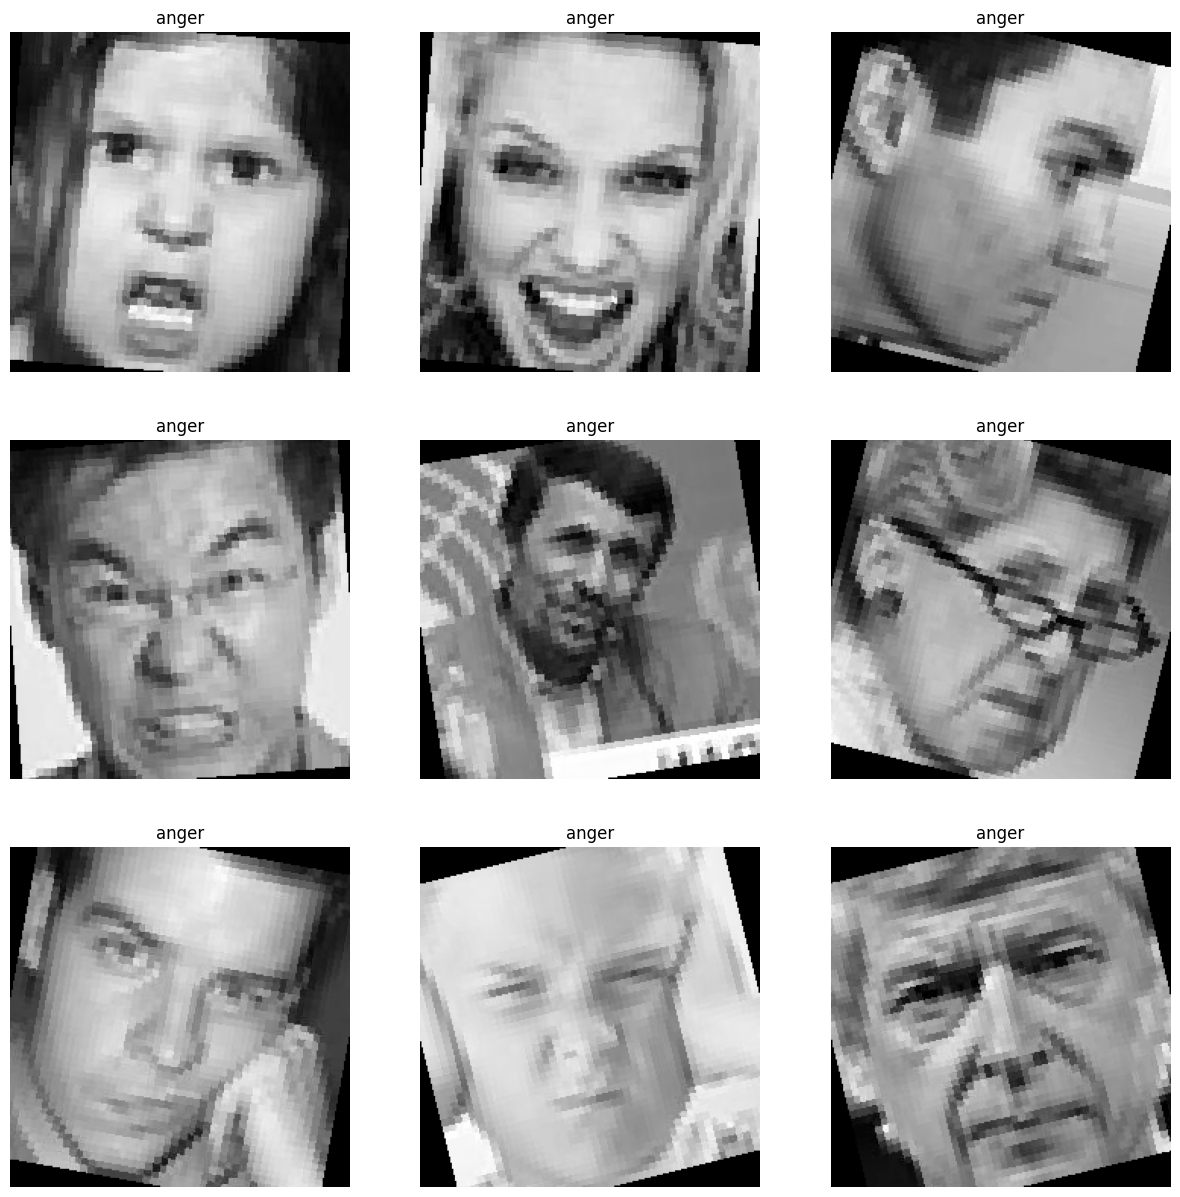

In [58]:
N_IMAGES = 10

images, labels = zip(*[(image, label) for image, label in 
                           [train_ds[i] for i in range(N_IMAGES)]])

classes = train_ds.classes

plot_images(images, labels, classes)


In [59]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()
                
        block, n_blocks, channels = config
        self.in_channels = channels[0]
            
        assert len(n_blocks) == len(channels) == 4
        
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)
        
    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):
    
        layers = []
        
        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False
        
        layers.append(block(self.in_channels, channels, stride, downsample))
        
        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels
            
        return nn.Sequential(*layers)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)
        
        return x, h

class BasicBlock(nn.Module):
    
    expansion = 1
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
                
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
        
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        
        if self.downsample is not None:
            i = self.downsample(i)
                        
        x += i
        x = self.relu(x)
        
        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):
    
    expansion = 4
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
    
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
            
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
                
        if self.downsample is not None:
            i = self.downsample(i)
            
        x += i
        x = self.relu(x)
    
        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])

In [60]:
'''
pretrained_model = models.resnet50(pretrained=True)
IN_FEATURES = pretrained_model.fc.in_features 

# Access classes from the original full_dataset
OUTPUT_DIM = len(full_dataset.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
model = ResNet(resnet50_config, OUTPUT_DIM)
model.load_state_dict(pretrained_model.state_dict())
'''

'\npretrained_model = models.resnet50(pretrained=True)\nIN_FEATURES = pretrained_model.fc.in_features \n\n# Access classes from the original full_dataset\nOUTPUT_DIM = len(full_dataset.classes)\n\nfc = nn.Linear(IN_FEATURES, OUTPUT_DIM)\npretrained_model.fc = fc\nmodel = ResNet(resnet50_config, OUTPUT_DIM)\nmodel.load_state_dict(pretrained_model.state_dict())\n'

In [61]:
pretrained_model = models.resnet50(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features 
OUTPUT_DIM = len(train_ds.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
model = ResNet(resnet50_config, OUTPUT_DIM)
model.load_state_dict(pretrained_model.state_dict())

<All keys matched successfully>

In [62]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')


The model has 23,522,375 trainable parameters


In [63]:
'''
import torch.optim as optim

# Define the desired learning rate
START_LR = 2e-4

# Create an instance of the RMSprop optimizer with the specified learning rate and alpha
optimizer = optim.RMSprop(model.parameters(), lr=START_LR, alpha=0.99)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)
'''


"\nimport torch.optim as optim\n\n# Define the desired learning rate\nSTART_LR = 2e-4\n\n# Create an instance of the RMSprop optimizer with the specified learning rate and alpha\noptimizer = optim.RMSprop(model.parameters(), lr=START_LR, alpha=0.99)\n\ndevice = torch.device('cuda' if torch.cuda.is_available() else 'cpu')\n\ncriterion = nn.CrossEntropyLoss()\n\nmodel = model.to(device)\ncriterion = criterion.to(device)\n"

In [64]:
import torch.optim as optim

# Define the desired learning rate and betas
START_LR = 2e-4
betas = (0.9, 0.999)

# Create an instance of the Adam optimizer with the specified learning rate and betas
optimizer = optim.Adam(model.parameters(), lr=START_LR, betas=betas)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)


In [65]:
# Later in your code when you want to change learning rates for specific parameter groups
FOUND_LR = 1e-5

# Adjust learning rates for specific parameter groups
for param_group in optimizer.param_groups:
    if param_group['params'] in [model.conv1.parameters(), model.bn1.parameters()]:
        param_group['lr'] = FOUND_LR / 10
    elif param_group['params'] in [model.layer1.parameters()]:
        param_group['lr'] = FOUND_LR / 8
    elif param_group['params'] in [model.layer2.parameters()]:
        param_group['lr'] = FOUND_LR / 6
    elif param_group['params'] in [model.layer3.parameters()]:
        param_group['lr'] = FOUND_LR / 4
    elif param_group['params'] in [model.layer4.parameters()]:
        param_group['lr'] = FOUND_LR / 2
    elif param_group['params'] in [model.fc.parameters()]:
        param_group['lr'] = FOUND_LR

# Now, you've adjusted the learning rates for specific parameter groups in the Adam optimizer


In [66]:
'''
FOUND_LR = 1e-5
params = [
          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': model.fc.parameters()}
         ]


optimizer = optim.RMSprop(params, lr=FOUND_LR, alpha=0.99)
'''

"\nFOUND_LR = 1e-5\nparams = [\n          {'params': model.conv1.parameters(), 'lr': FOUND_LR / 10},\n          {'params': model.bn1.parameters(), 'lr': FOUND_LR / 10},\n          {'params': model.layer1.parameters(), 'lr': FOUND_LR / 8},\n          {'params': model.layer2.parameters(), 'lr': FOUND_LR / 6},\n          {'params': model.layer3.parameters(), 'lr': FOUND_LR / 4},\n          {'params': model.layer4.parameters(), 'lr': FOUND_LR / 2},\n          {'params': model.fc.parameters()}\n         ]\n\n\noptimizer = optim.RMSprop(params, lr=FOUND_LR, alpha=0.99)\n"

In [68]:
EPOCHS = 10
STEPS_PER_EPOCH = len(train_iter)
TOTAL_STEPS = EPOCHS * STEPS_PER_EPOCH

MAX_LRS = [p['lr'] for p in optimizer.param_groups]

scheduler = lr_scheduler.OneCycleLR(optimizer,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)

In [69]:
def calculate_topk_accuracy(y_pred, y, k=2):
    with torch.no_grad():
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 = correct[:1].reshape(-1).float().sum(0, keepdim=True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size
    return acc_1, acc_k


In [70]:
def train(model, iterator, optimizer, criterion, scheduler, device):
    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.train()

    for (x, y) in iterator:
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        scheduler.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5



In [71]:
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0
    model.eval()
    with torch.no_grad():
        for (x, y) in iterator:
            x = x.to(device)
            y = y.to(device)
            y_pred, _ = model(x)
            loss = criterion(y_pred, y)
            acc_1, acc_5 = calculate_topk_accuracy(y_pred, y)
            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()
    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)
    return epoch_loss, epoch_acc_1, epoch_acc_5


In [72]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [73]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("GPU is not available.")


GPU is available.


In [74]:
import torch

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA version: {torch.version.cuda}")


PyTorch version: 1.9.0+cu111
CUDA version: 11.1


In [75]:
best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    
    start_time = time.monotonic()
    
    train_loss, train_acc_1, train_acc_5 = train(model, train_iter, optimizer, criterion, scheduler, device)
    valid_loss, valid_acc_1, valid_acc_5 = evaluate(model, valid_iter, criterion, device)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
       # print(epoch)
        torch.save(model.state_dict(), 'tut5-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc @1: {train_acc_1*100:6.2f}% | ' \
          f'Train Acc @5: {train_acc_5*100:6.2f}%')
    print(f'\tValid Loss: {valid_loss:.3f} | Valid Acc @1: {valid_acc_1*100:6.2f}% | ' \
          f'Valid Acc @5: {valid_acc_5*100:6.2f}%')

Epoch: 01 | Epoch Time: 2m 14s
	Train Loss: 1.820 | Train Acc @1:  30.93% | Train Acc @5:  48.60%
	Valid Loss: 1.691 | Valid Acc @1:  34.38% | Valid Acc @5:  53.82%
Epoch: 02 | Epoch Time: 2m 13s
	Train Loss: 1.445 | Train Acc @1:  44.72% | Train Acc @5:  65.30%
	Valid Loss: 1.192 | Valid Acc @1:  55.29% | Valid Acc @5:  73.82%
Epoch: 03 | Epoch Time: 2m 13s
	Train Loss: 1.089 | Train Acc @1:  59.91% | Train Acc @5:  77.93%
	Valid Loss: 0.977 | Valid Acc @1:  65.33% | Valid Acc @5:  81.80%
Epoch: 04 | Epoch Time: 2m 13s
	Train Loss: 0.927 | Train Acc @1:  66.11% | Train Acc @5:  82.92%
	Valid Loss: 0.861 | Valid Acc @1:  69.01% | Valid Acc @5:  84.63%
Epoch: 05 | Epoch Time: 2m 11s
	Train Loss: 0.831 | Train Acc @1:  69.63% | Train Acc @5:  85.90%
	Valid Loss: 0.814 | Valid Acc @1:  70.99% | Valid Acc @5:  86.07%
Epoch: 06 | Epoch Time: 2m 11s
	Train Loss: 0.762 | Train Acc @1:  72.54% | Train Acc @5:  87.63%
	Valid Loss: 0.786 | Valid Acc @1:  71.84% | Valid Acc @5:  87.21%
Epoch: 07 

In [76]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs


In [77]:
images, labels, probs = get_predictions(model, test_iter)

In [78]:

test = pd.read_csv('C:/Users/22453933/OneDrive - MMU\Downloads/fer_train_val_test/GroundTruth.csv')
test.drop(['id'], axis=1, inplace=True)

# Create the y_test array
y_test = np.array(test)


In [79]:
print(probs.shape[1])  # This will print the number of classes in the probs array


7


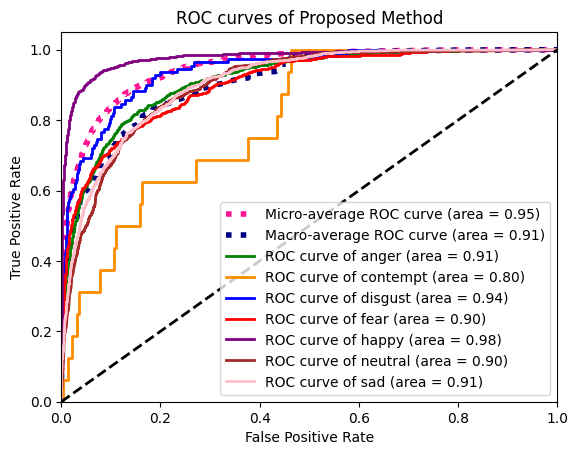

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_classes = 7

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First, aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally, average and compute the macro-average ROC AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
lw = 2

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# Plot ROC curves for each class
class_labels = ["anger", "contempt","disgust", "fear", "happy", "neutral", "sad"]
class_colors = ["green", "darkorange", "blue", "red", "purple", "brown", "pink"]

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=class_colors[i], lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[ 658    0    5   45   39   81   76]
 [   5    0    0    0    2    4    5]
 [  63    0   19    4    6    2   17]
 [ 111    0    1  355   38   48  110]
 [  38    0    3   21 1609   57   27]
 [  97    0    1   22  109  591  181]
 [ 113    0    0   36   46  150  706]]
Class names: [0 1 2 3 4 5 6]
Normalized Confusion Matrix:
[[0.72787611 0.         0.00553097 0.04977876 0.04314159 0.08960177
  0.0840708 ]
 [0.3125     0.         0.         0.         0.125      0.25
  0.3125    ]
 [0.56756757 0.         0.17117117 0.03603604 0.05405405 0.01801802
  0.15315315]
 [0.16742081 0.         0.0015083  0.53544495 0.05731523 0.07239819
  0.16591252]
 [0.02165242 0.         0.0017094  0.01196581 0.91680912 0.03247863
  0.01538462]
 [0.0969031  0.         0.000999   0.02197802 0.10889111 0.59040959
  0.18081918]
 [0.10751665 0.         0.         0.03425309 0.04376784 0.14272122
  0.6717412 ]]


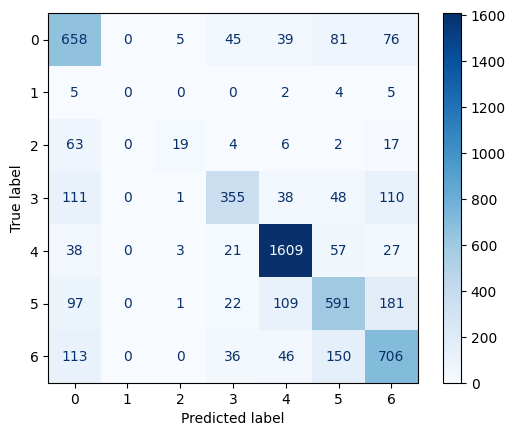

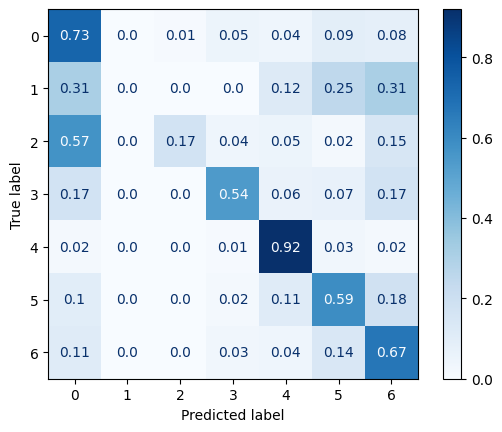

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have already obtained the predictions from your model
pred_class = np.argmax(probs, axis=1)
true_class = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print("Confusion Matrix:")
print(cm)
print("Class names:", class_names)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

# Normalize the confusion matrix by the number of samples in each class
C = cm
divisor = np.zeros((n_classes, n_classes))
for i in range(n_classes):
    divisor[i][:] = np.sum(y_test[:, i])

cm_normalised = np.divide(cm, divisor)
print("Normalized Confusion Matrix:")
print(cm_normalised)

cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

plt.show()


In [83]:
def plot_filtered_images(images, filters, n_filters = None, normalize = True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim = 0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize = (30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1,2,0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap = 'bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off');

    fig.subplots_adjust(hspace = -0.7)

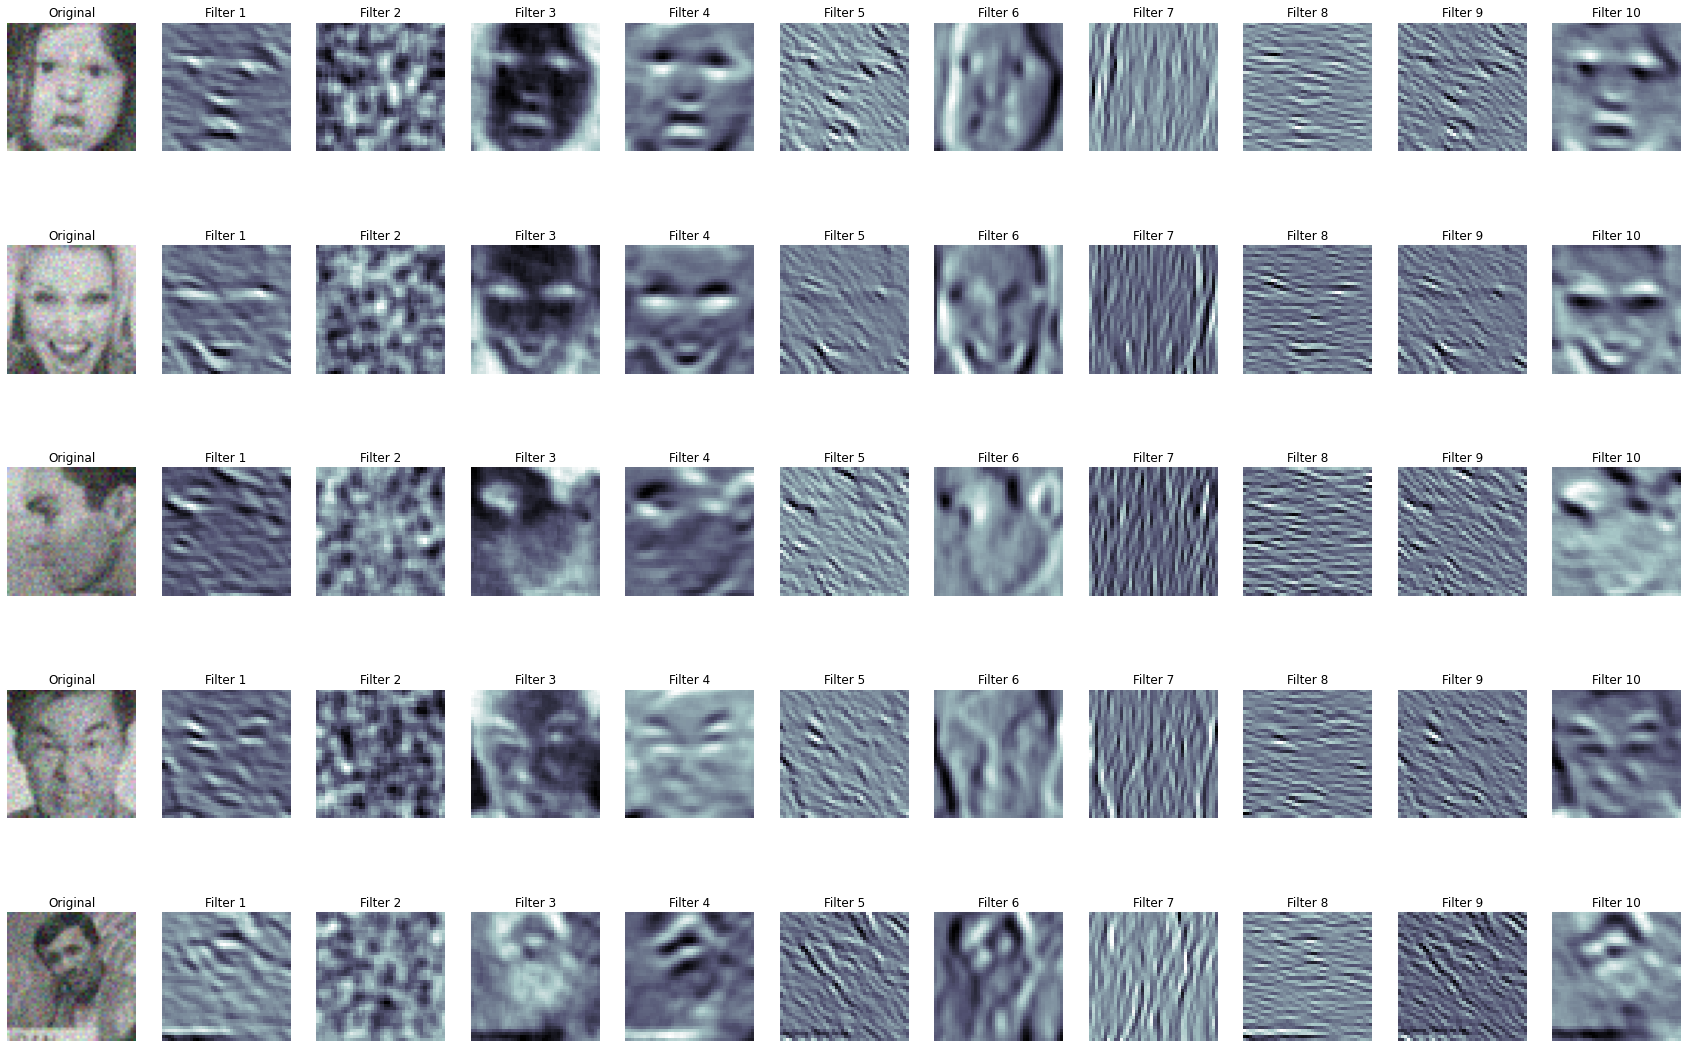

In [34]:
N_IMAGES = 5
N_FILTERS = 10

images = [image for image, label in [train_ds[i] for i in range(N_IMAGES)]]
filters = model.conv1.weight.data

plot_filtered_images(images, filters, N_FILTERS)